In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 4 признака, первый это фактически свободный член
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
# одно целевое свойство
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)
# признаки обладают разной связью с целевым свойством: в частности, некоторые очень далеки

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
# стандартизация
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [10]:
X_st # ответ по итогами стандартизации

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [11]:
# логистические потери
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [12]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [13]:
# функция построения сигмоида
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

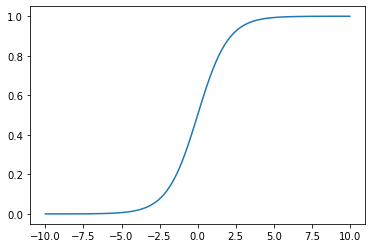

In [14]:
# прорисуем сигмоид - логистическую функцию
z = np.linspace(-10, 10, 101)

probabilities = sigmoid(z)
plt.plot(z, probabilities)
plt.show()

In [15]:
# Logistic Regression

def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z) # прогоняем данные через сигмоид, свернув лин модель
        err = calc_logloss(y, y_pred) # получить ошибку для наших логистических потерь
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) # использовать пред 2 строки для адаптации, градиентный спуск в чистом виде
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [16]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.765117774502237
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442177
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515639
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.553273778823678


1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (не уверена, что правильно поняла задачу)

In [17]:
def calc_logloss_new(y, y_pred):
    try:
        err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
        err = np.sum(err)
        return err
    except ValueError:
        print('Логарифм в 0 неопределен')

In [27]:
# Logistic Regression

def eval_model_new(X, y, iterations, alpha):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z) # прогоняем данные через сигмоид, свернув лин модель
        err = calc_logloss_new(y, y_pred) # получить ошибку для наших логистических потерь
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) # использовать пред 2 строки для адаптации, градиентный спуск в чистом виде
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    print(f'iterations: {iterations}, alpha: {alpha},logloss:  {err}')
    return W

In [28]:
W = eval_model_new(X_st, y, iterations=500, alpha=1e-3)

iterations: 500, alpha: 0.001,logloss:  0.5533458057511684


2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [30]:
alpha_array = [1e-1, 5e-1, 1e-2, 1e-3, 1e-4, 1e-5]
iterations_array = [100, 500, 1000, 5000, 10000, 50000]
for alpha_loc in alpha_array:
    for iterations_loc in iterations_array:
        W = eval_model_new(X_st, y, iterations=iterations_loc, alpha=alpha_loc)

iterations: 100, alpha: 0.1,logloss:  0.47660345824649486
iterations: 500, alpha: 0.1,logloss:  0.41825884533907043
iterations: 1000, alpha: 0.1,logloss:  0.37540242293062054
iterations: 5000, alpha: 0.1,logloss:  0.2698091230218946
iterations: 10000, alpha: 0.1,logloss:  0.23214418399379286
iterations: 50000, alpha: 0.1,logloss:  0.14388100734616993
iterations: 100, alpha: 0.5,logloss:  0.4185507211842677
iterations: 500, alpha: 0.5,logloss:  0.3116859301749715
iterations: 1000, alpha: 0.5,logloss:  0.26981639596053153
iterations: 5000, alpha: 0.5,logloss:  0.18075411992482762
iterations: 10000, alpha: 0.5,logloss:  0.14387927035605036
iterations: 50000, alpha: 0.5,logloss:  0.08653984942145551
iterations: 100, alpha: 0.01,logloss:  0.5202099204174199
iterations: 500, alpha: 0.01,logloss:  0.4910268478489977
iterations: 1000, alpha: 0.01,logloss:  0.47648567288032373
iterations: 5000, alpha: 0.01,logloss:  0.41818207186671463
iterations: 10000, alpha: 0.01,logloss:  0.3753579132752236

лучшие показатели: iterations: 50000, alpha: 0.5,logloss:  0.08653984942145551  !!!!

In [39]:
iterations_opt = 50000
alpha_opt = 0.5
W_ = eval_model(X_st, y, iterations=iterations_opt, alpha=alpha_opt)

5000 [-17.32873106  -1.94875871  -4.38792531  14.46232766] 0.18075411992482762
10000 [-24.52791135  -2.59436019  -6.46612462  20.31385673] 0.14387927035605036
15000 [-29.60781804  -3.05409533  -7.90850148  24.43350375] 0.12572836419858785
20000 [-33.59456965  -3.41360591  -9.03387462  27.65607693] 0.11461813473059941
25000 [-36.92357094  -3.71103     -9.97256713  30.33709837] 0.10690571905556985
30000 [-39.81690382  -3.9662702  -10.78961189  32.65807625] 0.10110140579922255
35000 [-42.40206645  -4.19091252 -11.52179645  34.72326776] 0.09648333068376305
40000 [-44.75861236  -4.39225879 -12.19182203  36.59776142] 0.09265828210563028
45000 [-46.93932281  -4.57519802 -12.81461136  38.32478351] 0.08939299754979863
50000 [-48.98089252  -4.74316616 -13.40044849  39.93443908] 0.08653984942145551


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [42]:
def calc_pred_proba(w, X):
    m = X.shape[1]    
    y_pred_proba = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_pred_proba[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_pred_proba[:, i] = 0
    
    return y_pred_proba

In [43]:
y_pred_proba = calc_pred_proba(W_, X_st)

In [44]:
y_pred_proba

array([[0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred). Я так поняла, что при разных пороговых значениях

In [51]:
def calc_pred(w, X, threshold = 0.5):
    m = X.shape[1]    
    y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)    
    A = sigmoid(np.dot(w.T, X))
    
    for i in range(A.shape[1]):
        if (A[:,i] > threshold): 
            y_pred[:, i] = 1
        elif (A[:,i] <= threshold):
            y_pred[:, i] = 0
    
    return y_pred

In [62]:
y_pred_05 = calc_pred(W_, X_st)
y_pred_05

array([[0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]])

In [53]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [56]:
y_pred_03 = calc_pred(W_, X_st, threshold = 0.3)
y_pred_03

array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 1.]])

In [59]:
for threshold_loc in range(1, 10):
    y_pred = calc_pred(W_, X_st, threshold_loc/10)
    print(f'for threshold = {threshold_loc} predict: {y_pred}')

for threshold = 1 predict: [[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]]
for threshold = 2 predict: [[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]]
for threshold = 3 predict: [[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]]
for threshold = 4 predict: [[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]]
for threshold = 5 predict: [[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]]
for threshold = 6 predict: [[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]]
for threshold = 7 predict: [[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]]
for threshold = 8 predict: [[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]]
for threshold = 9 predict: [[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]]


5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score

In [65]:
# accuracy считаем для случая порогового значения 0.5
accuracy = np.sum(y_pred_05)/y_pred_05.shape[1] 
accuracy

0.5

In [69]:
# матрицу ошибок считаем для случая порогового значения 0.5
matrix = np.array(pd.crosstab(y, y_pred_05[0]))
matrix

array([[5, 0],
       [0, 5]])

In [70]:
# precition (точность) считаем для случая порогового значения 0.5
precition = matrix[1,1]/(matrix[1,1] + matrix[0,1])
precition

1.0

In [72]:
# recall (полноту) считаем для случая порогового значения 0.5
recall = matrix[1,1]/(matrix[1,1] + matrix[1,0])
recall

1.0

In [75]:
# F1 считаем для случая порогового значения 0.5

F1 = 2 * precition * recall / (precition + recall)
F1

1.0

In [74]:
# F2 считаем для случая порогового значения 0.5

F2 = 5 * precition * recall / (4 * precition + recall)
F2

1.0

6. Могла ли модель переобучиться? Почему?
В ходе предыдущих курсов и данного занятия всплавали следующие причины переобучения:
первая - присутсвие сильной кореляции в данных;
вторая - плохая предобработка (выбросы и отсутсвие регуляризаци);
третья - несбалансированные классы.
Так же в литературе нашла еще одну причину переобучения - недостаточное количество данных.